In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import os
import cv2
torch.nn.Module.dump_patches = True

In [2]:
torch.cuda.get_device_name(0)


'GeForce RTX 2080 Ti'

In [3]:
# ## Data

# Path to the parent folder, where the train (samples + masks) and validation (samples + masks) sets plus are located

# In[2]:


path = 'C:/Users/rdak7/Desktop/govardhan/New/dataset/'


# In[3]:


fnames = get_image_files(os.path.join(path +'/val'))


# In[4]:


lbl_names = get_image_files(os.path.join(path+'/valannot'))


# In[5]:


def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

classes = array(['Void','Dark Circles', 'Normal', 'wrinkles', 'Rosacia', 'Acne'])


# In[6]:


mask = open_mask(get_y_fn(fnames[0]))


# In[7]:


src_size = np.array(mask.shape[1:])



In [4]:

bs,size = 4,src_size

src = (SegmentationItemList.from_folder(path)
       .split_by_folder(valid='val')
       .label_from_func(get_y_fn, classes=classes)
      )


data = (src.transform(get_transforms(max_rotate = 2.0, max_warp = 0.1), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

name2id = {v:k for k,v in enumerate(classes)}

def accuracy(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

In [5]:
data

ImageDataBunch;

Train: LabelList (164 items)
x: SegmentationItemList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: SegmentationLabelList
ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500)
Path: C:\Users\rdak7\Desktop\govardhan\New\dataset;

Valid: LabelList (164 items)
x: SegmentationItemList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: SegmentationLabelList
ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500),ImageSegment (1, 500, 500)
Path: C:\Users\rdak7\Desktop\govardhan\New\dataset;

Test: None

In [6]:
## to_fp16() switches the model to mixed precision mode. When the model is run on hardware that
# is optimised for mixed precision operation, then there should be a speed up in computation time.
## --> can use bigger batchsizes and possibly also bigger/more complex models. e.g. resnet50
learn = unet_learner(data, models.resnet34, metrics=accuracy, wd=1e-2, bottle=True)#.to_fp16()


In [7]:
CUDA_LAUNCH_BLOCKING=1

In [8]:
# In[13]:

lr_find(learn)

# In[15]:


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


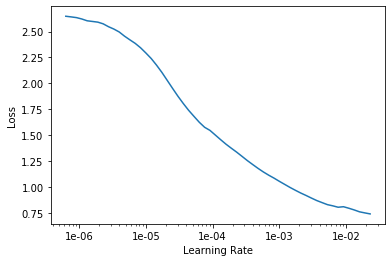

In [9]:
learn.recorder.plot()

In [10]:
lr=1e-5

In [13]:
# In[24]:


## "classical" fitting. Here, training with a low learning rate after training 
## with the one-cycle policy above. Experimentally found that it further improves 
## the model performance
learn.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)




epoch,train_loss,valid_loss,accuracy,time
0,0.103223,0.057548,0.988443,03:02
1,0.070860,0.047197,0.988815,03:03
2,0.054702,0.042730,0.988837,03:03
3,0.047217,0.037308,0.989329,03:06
4,0.040955,0.035799,0.988602,03:10
5,0.037955,0.032433,0.989659,03:09
6,0.036327,0.032243,0.989972,03:03
7,0.037240,0.033950,0.989834,03:02
8,0.035594,0.029799,0.990185,03:03
9,0.033595,0.029355,0.989985,03:01


In [15]:
learn.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.026516,0.024693,0.991338,03:19
1,0.026130,0.025267,0.991016,03:02
2,0.025336,0.024478,0.990575,03:03
3,0.026819,0.024314,0.991028,03:02
4,0.025813,0.023111,0.991008,03:02
5,0.025460,0.021494,0.991504,03:03
6,0.024559,0.020615,0.991803,03:02
7,0.024939,0.021841,0.991814,03:04
8,0.024133,0.020753,0.991785,03:14
9,0.023153,0.020616,0.991810,03:09


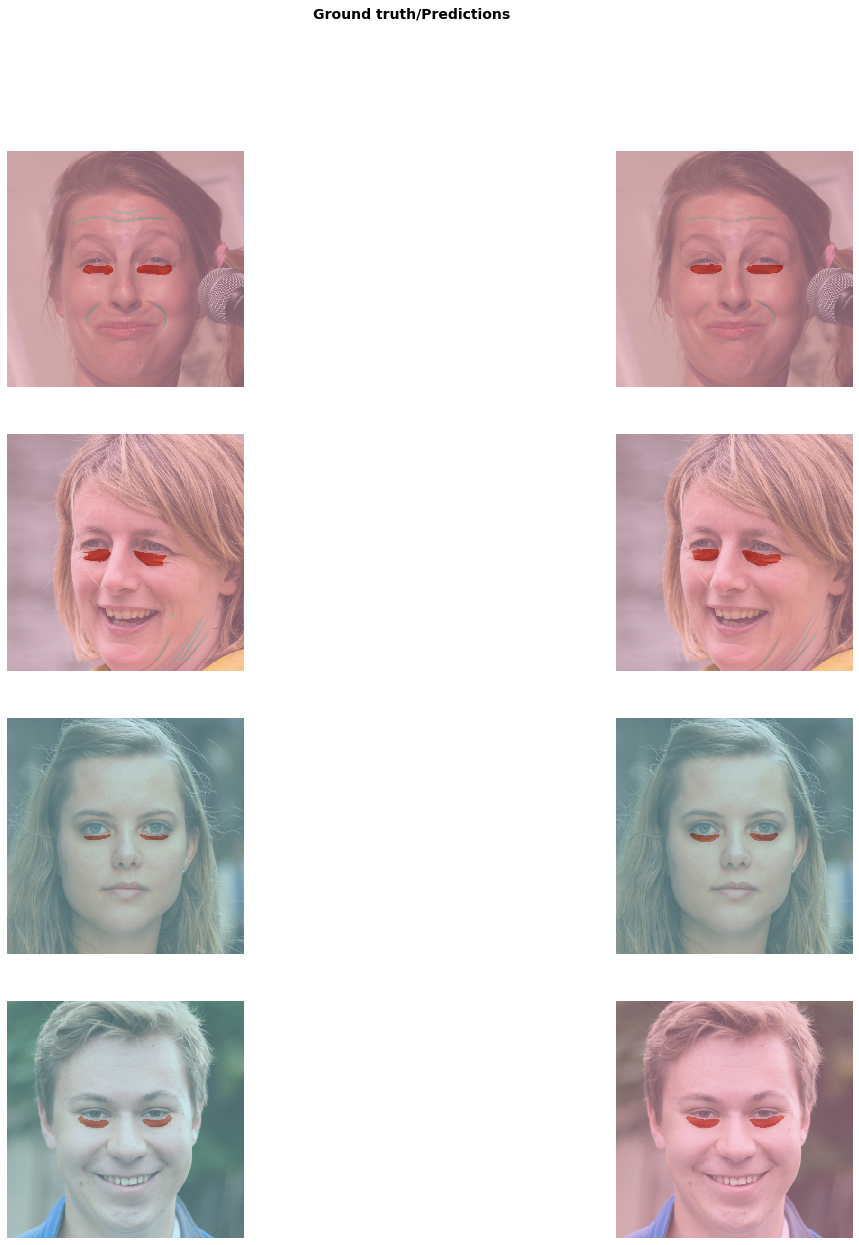

In [16]:
learn.show_results(rows=9, figsize=(20, 20)) # show results

In [18]:
# In[19]:


## store the weights, e.g. for creating a model checkpoint, experimenting etc.
learn.save('model1_trained_5_19_2020')

In [ ]:
# In[36]:


## load the weights into a previously defined model (contained inside learn)
learn.load('C:/Users/rdak7/Desktop/granulate/dataset/models/model1_trained_1_22_2020')

# In[27]:

## Export the model. The difference here is, that all the required information for retrieval of 
## model is stored in the same file, whereas above methode only stores the weights.
learn.export()

In [40]:
# ## Data

# Path to the parent folder, where the train (samples + masks) and validation (samples + masks) sets plus are located

# In[2]:


path_2 = 'C:/Users/rdak7/Desktop/govardhan/New/dataset_2/'


# In[3]:


fnames_2 = get_image_files(os.path.join(path_2 +'/val'))


# In[4]:


lbl_names_2 = get_image_files(os.path.join(path_2+'/valannot'))


# In[5]:


def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

classes = array(['Void','Dark Circles', 'Normal', 'wrinkles', 'Rosacia', 'Acne','Freckles'])


# In[6]:


mask_2 = open_mask(get_y_fn(fnames_2[0]))


# In[7]:


src_size_2 = np.array(mask_2.shape[1:])


In [41]:
lbl_names_2

[WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/00001.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000010.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/0000100.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000011.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000012.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000013.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000014.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000015.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000016.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000017.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000018.png'),
 WindowsPath('C:/Users/rdak7/Desktop/govardhan/New/dataset_2/valannot/000019

In [44]:
bs,size = 8,src_size_2

src_2 = (SegmentationItemList.from_folder(path_2)
       .split_by_folder(valid='val')
       .label_from_func(get_y_fn, classes=classes)
      )


data_2 = (src_2.transform(get_transforms(max_rotate = 2.0, max_warp = 0.1), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

name2id = {v:k for k,v in enumerate(classes)}

def accuracy(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

In [45]:
data_2

ImageDataBunch;

Train: LabelList (200 items)
x: SegmentationItemList
Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294)
y: SegmentationLabelList
ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294)
Path: C:\Users\rdak7\Desktop\govardhan\New\dataset_2;

Valid: LabelList (200 items)
x: SegmentationItemList
Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294)
y: SegmentationLabelList
ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294)
Path: C:\Users\rdak7\Desktop\govardhan\New\dataset_2;

Test: None

In [46]:
## to_fp16() switches the model to mixed precision mode. When the model is run on hardware that
# is optimised for mixed precision operation, then there should be a speed up in computation time.
## --> can use bigger batchsizes and possibly also bigger/more complex models. e.g. resnet50
learn_2 = unet_learner(data_2, models.resnet34, metrics=accuracy, wd=1e-2, bottle=True)#.to_fp16()


In [47]:
lr_find(learn_2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


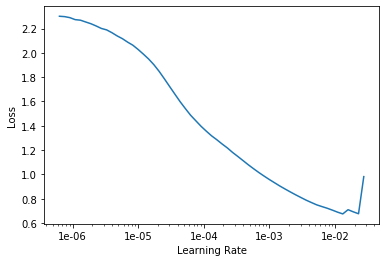

In [48]:
learn_2.recorder.plot()

In [49]:
lr_2=1e-5

In [50]:
# In[18]:


## fitting model with one-cycle policy
learn_2.fit_one_cycle(10, slice(lr_2), pct_start=0.6)


epoch,train_loss,valid_loss,accuracy,time
0,2.138273,1.815671,0.053046,02:51
1,1.788611,1.199754,0.394230,02:50
2,1.159463,0.152536,0.970527,02:50
3,0.691397,0.119545,0.982885,02:50
4,0.439567,0.098371,0.985856,02:51
5,0.295931,0.086539,0.988501,02:51
6,0.209277,0.078351,0.989536,02:50
7,0.156558,0.073994,0.989801,02:50
8,0.123997,0.071867,0.989904,02:50
9,0.104068,0.071483,0.989937,02:49


In [53]:
learn_2.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.066760,0.055717,0.990272,02:58
1,0.059578,0.052719,0.990323,02:57
2,0.056202,0.048335,0.990288,02:56
3,0.052471,0.044259,0.990253,02:50
4,0.050203,0.042048,0.990434,02:50
5,0.048197,0.039850,0.990415,02:49
6,0.046999,0.043132,0.990391,02:56
7,0.045456,0.037924,0.990538,02:51
8,0.043945,0.037433,0.990601,02:55
9,0.042174,0.036305,0.990628,02:58


In [55]:
learn_2.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.036373,0.032724,0.990789,02:57
1,0.037214,0.033081,0.990670,02:55
2,0.035807,0.031919,0.990728,02:55
3,0.035397,0.033171,0.990858,02:57
4,0.034838,0.029494,0.991185,02:52
5,0.033731,0.027971,0.991232,02:49
6,0.033035,0.030556,0.991195,02:49
7,0.032816,0.027825,0.991392,02:50
8,0.032991,0.036501,0.990476,02:50
9,0.033352,0.028515,0.991387,02:50


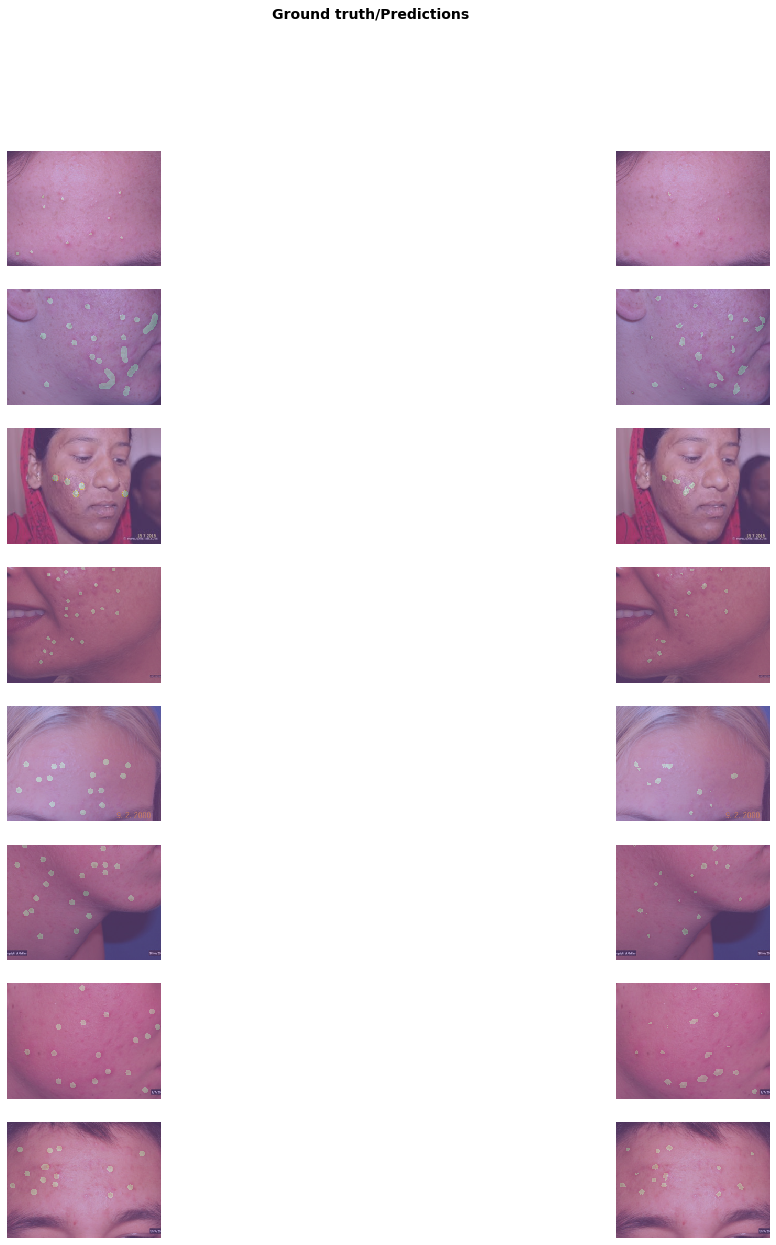

In [56]:
learn_2.show_results(rows=9, figsize=(20, 20)) # show results